<a href="https://colab.research.google.com/github/JamilePolycarpo/MachineLearning/blob/main/ROC_Curves_and_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curvas de ROC

Toy example:

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Vamos utilizar dados gerados (saídas e probabilidadeS)

In [ ]:
y = np.array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2])
scores = np.array([0.1, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
roc_auc = roc_auc_score(y, scores)
print("AUC: {}".format(roc_auc))

AUC: 0.7857142857142858


Agora vamos plotar a curva de ROC

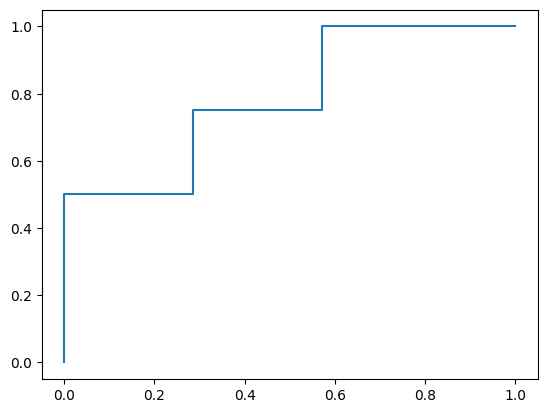

In [ ]:
plt.figure()
plt.plot(fpr, tpr)

## Um Exemplo com dados reais

Seção contendo os imports necessários

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Vamos gerar um problema de classificação com 5 características e 2 classes

In [ ]:
# generate 2 class dataset
X, Y = make_classification(n_samples=1000, n_features=5, n_classes=2,
                           random_state=1)

Inspecionando o dataset gerado:

In [ ]:
X[:5]

array([[-1.39087601,  0.62478042,  3.4809096 ,  2.3823372 ,  0.38622388],
       [-0.48529475,  0.30051483,  1.33915253,  0.84620081,  1.17745439],
       [-0.73504687,  0.13412273,  1.54350554,  1.22343943, -0.62879943],
       [ 0.6594484 ,  1.47747999,  1.0281535 , -0.80770875, -0.34350003],
       [ 0.17288184,  0.99271923,  1.18375139, -0.10191134,  0.08911753]])

In [ ]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

Agora vamos separar os dados em **treino** e **teste**:

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.5,
                                                random_state=2)

e treinar o nosso Regressor Logístico utilizando a classe `LogisticRegression` do scikit-learn

In [ ]:
# fit a model
model = LogisticRegression()
model.fit(trainX, trainY)

LogisticRegression()

Agora vamos avaliar a qualidade do nosso modelo utilizando a partição de **teste**

In [ ]:
pred_prob = model.predict_proba(testX)

Vamos manter somente o resultado positivo -> o exemplo pertence a classe `1`

In [ ]:
pred_prob = pred_prob[:,1]

Agora calculamos o score AUC:

In [ ]:
auc = roc_auc_score(testY, pred_prob)
print("AUC score: {:.3f}".format(auc))

AUC score: 0.934


Vamos calcular os parâmetros necessários para plotar a curva de ROC:

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY,
                                                                pred_prob)

Agora vamos plotar a curva:

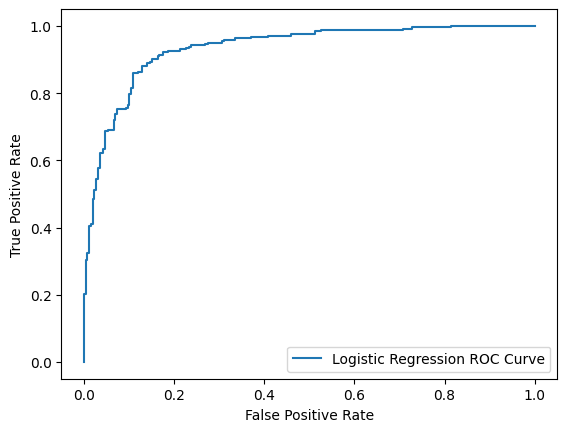

In [ ]:
pyplot.plot(false_positive_rate, true_positive_rate,
            label='Logistic Regression ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Exercício

O conjunto de dados está disponível publicamente no Kaggle e é proveniente de um estudo cardiovascular em curso sobre residentes da cidade de Framingham, Massachusetts. O objetivo da classificação é prever se o doente tem um risco de 10 anos de futura doença coronária (CHD). O conjunto de dados fornece as informações dos doentes. Inclui mais de 4.000 registos e 15 atributos.

Cada atributo é um potencial factor de risco. Existem factores de risco demográficos, comportamentais e médicos.

### Download and read the data:

In [1]:
!pip install gdown

In [2]:
!gdown https://drive.google.com/uc?id=1yHNFuQkro58eBbcfy27aM4IwcGUwHtpO

Downloading...
From: https://drive.google.com/uc?id=1yHNFuQkro58eBbcfy27aM4IwcGUwHtpO
To: /content/framingham.csv
100% 196k/196k [00:00<00:00, 32.5MB/s]


In [3]:
!head -10 framingham.csv

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85,0
0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99,0
0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1
0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78,0
1,52,1,0,0,0,0,1,0,260,141.5,89,26.36,76,79,0


Read the data using Pandas

In [4]:
import pandas as pd

In [5]:
heart_df=pd.read_csv("framingham.csv")

In [6]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Tarefas

1.Explore os dados e crie um classificador de Regressão Logística para prever a variável `TenYearCHD`.
1. Experimente uma combinação de variáveis para construir o melhor classificador.
1. Construir curvas ROC e calcular a AUC para comparar os classificadores.
1. Comparar com os classificadores `SVM` e `KNN`

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
(heart_df.isnull().sum() / heart_df.shape[0] * 100).sort_values(ascending=False)

glucose            9.155262
education          2.477584
BPMeds             1.250590
totChol            1.179802
cigsPerDay         0.684285
BMI                0.448325
heartRate          0.023596
male               0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

In [9]:
# Pesquisando por valores unicos
heart_df.nunique().sort_values()

male                  2
currentSmoker         2
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
TenYearCHD            2
education             4
cigsPerDay           33
age                  39
heartRate            73
glucose             143
diaBP               146
sysBP               234
totChol             248
BMI                1363
dtype: int64

In [11]:
# Drop dos valores nulos
heart_df.dropna()
heart_df.isna().sum()
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

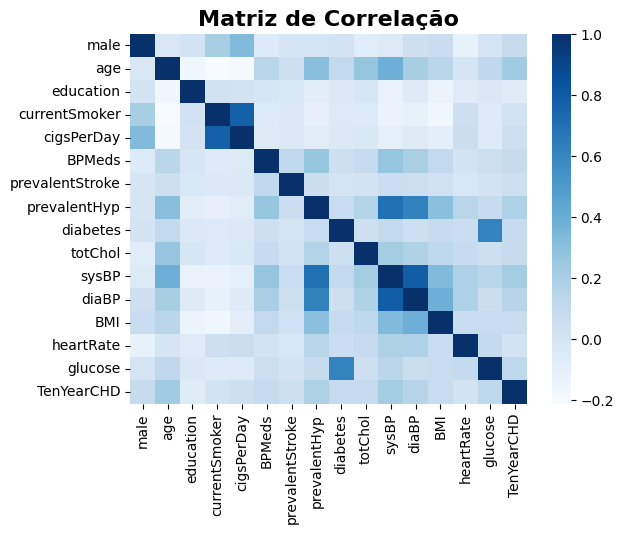

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Matriz de correlação
tmp_data = heart_df

dataplot = sns.heatmap(tmp_data.corr(), cmap="Blues")
plt.title("Matriz de Correlação", fontsize=16, fontweight='bold')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
# Separar a variável alvo
heart_df.dropna(inplace=True)
X = heart_df.drop(columns='TenYearCHD')
y = heart_df['TenYearCHD']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split



# Criar e treinar o modelo
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Fazer previsões
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

log_reg_r = mean_squared_error(y_test, y_pred_test)
log_reg_r2 = r2_score(y_test, y_pred_test)


# Avaliar o modelo
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Erro Quadrático: {log_reg_r}')
print(f'Rˆ2 Score: {log_reg_r2}')
print(f'Acurácia de Treino: {train_accuracy}')
print(f'Acurácia de Teste: {test_accuracy}')

Erro Quadrático: 0.15223336371923427
Rˆ2 Score: -0.14070185925455436
Acurácia de Treino: 0.8573661586557249
Acurácia de Teste: 0.8477666362807658


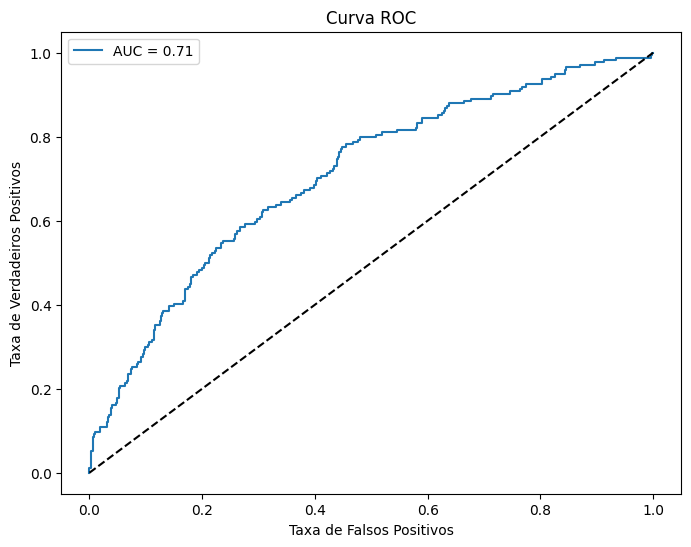

AUC Score (Regressão Logística): 0.7072265600677452


In [32]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular e imprimir a AUC
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


print(f'AUC Score (Regressão Logística): {auc_score}')



AUC Score (SVM): 0.5
AUC Score (KNN): 0.5358027919951185


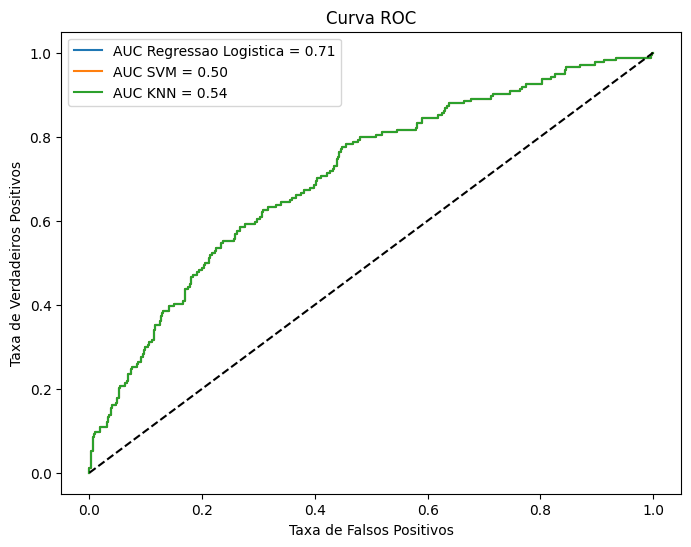

In [37]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Treino SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
auc_roc_svm = roc_auc_score(y_test, y_pred_svm)


print(f'AUC Score (SVM): {auc_roc_svm}')

#Treino Knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
auc_roc_knn = roc_auc_score(y_test, y_pred_knn)

print(f'AUC Score (KNN): {auc_roc_knn}')

#Curva ROC de todos os classificadores

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC Regressao Logistica = {auc_score:.2f}')
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr_svm, tpr_svm, label=f'AUC SVM = {auc_roc_svm:.2f}')
fpr_knn, tpr_knn, _= roc_curve(y_test, y_pred_prob)
plt.plot(fpr_knn, tpr_knn, label=f'AUC KNN = {auc_roc_knn:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

